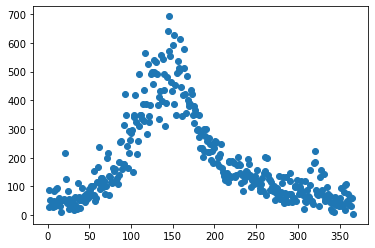

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import arviz as az
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

w=pd.read_csv("1950-2020_all_tornadoes.csv")




x=np.linspace(1,366,366)
torn=np.zeros([366,1])

year={}
year['1']=0
year['2']=31
year['3']=59
year['4']=90
year['5']=120
year['6']=151
year['7']=181
year['8']=212
year['9']=243
year['10']=273
year['11']=304
year['12']=334

for i in range(len(w['mo'])):
    day=int(w['dy'][i])
    month=str(w['mo'][i])
    mm=year[month]
    ww=day+mm
    if str(w['mo'][i])=='2'and str(w['dy'][i])=='29' or w['yr'][i]%4==0 and str(w['mo'][i])!='1' and str(w['mo'][i])!='2':
        ww=ww+1
    torn[ww-1]=torn[ww-1]+1
plt.plot(x,torn,'o')




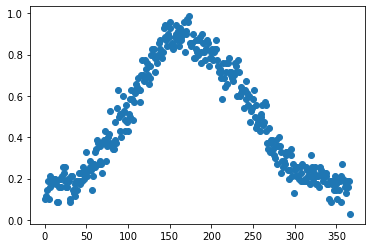

In [2]:
lista=[]
days=np.zeros([366,1]) #probability of tornado occuring at least once on a specific day

for i in range(len(w['mo'])):
    if w['date'][i] not in lista:
        lista.append(w['date'][i])
        day=int(w['dy'][i])
        month=str(w['mo'][i])
        mm=year[month]
        ww=day+mm
        if str(w['mo'][i])=='2'and str(w['dy'][i])=='29' or w['yr'][i]%4==0 and str(w['mo'][i])!='1' and str(w['mo'][i])!='2':
            ww=ww+1
        days[ww-1]=days[ww-1]+1
plt.plot(x,days/70,'o')

In [3]:
model1_ppc=CmdStanModel(stan_file='model1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
m1=model1_ppc.sample(iter_sampling=100000,chains=1,fixed_param=True)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [5]:
mu1=m1.stan_variable('mu')
sigma1=m1.stan_variable('sigma')
prob1=m1.stan_variable('prob')

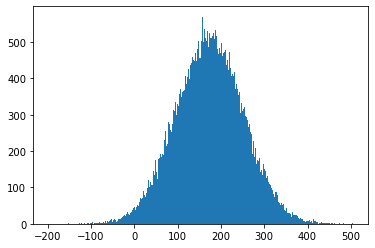

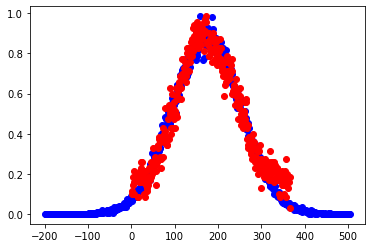

In [6]:
mini=1000
maxi=0
for i in prob1:
    if i<mini:
        mini=i
    if i>maxi:
        maxi=i
bins=int(abs(maxi-mini))
u=plt.hist(prob1,bins=bins)

plt.figure()
plt.plot(u[1][:-1],u[0]/max(u[0])*69/70,'bo')
plt.plot(x,days/70,'ro')

In [6]:
model1_fit=CmdStanModel(stan_file='model1_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Emperor\model1_fit.stan to exe file C:\Users\Emperor\model1_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\model1_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Emperor/model1_fit.hpp C:/Users/Emperor/model1_fit.stan
Warning in 'C:/Users/Emperor/model1_fit.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/

In [7]:
y=np.linspace(1,366,366)
data=dict(N=len(y),probs=y)
m2=model1_fit.sample(data=data,iter_sampling=5000,chains=1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [9]:
mu2=m2.stan_variable('mu')
sigma2=m2.stan_variable('sigma')
prob2=m2.stan_variable('prob')



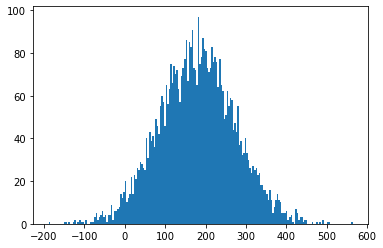

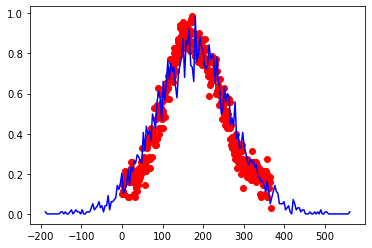

In [10]:
mini=1000
maxi=0
for i in prob2:
    if i<mini:
        mini=i
    if i>maxi:
        maxi=i
bins2=int(abs(maxi-mini))
u2=plt.hist(prob2,bins=200)

plt.figure()
plt.plot(x,days/70,'ro')
plt.plot(u2[1][:-1],u2[0]/max(u2[0])*69/70,'b-')



In [11]:
model2_ppc=CmdStanModel(stan_file='model2_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [12]:
m3=model2_ppc.sample(iter_sampling=5000,chains=1,fixed_param=True)
prob3=m3.stan_variable('prob')

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


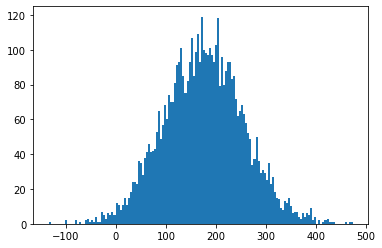

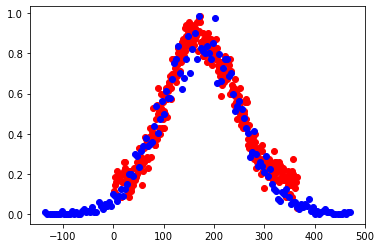

In [13]:
mini=1000
maxi=0
for i in prob3:
    if i<mini:
        mini=i
    if i>maxi:
        maxi=i
bins3=int(abs(maxi-mini))
u3=plt.hist(prob3,bins=150)

plt.figure()
plt.plot(x,days/70,'ro')
plt.plot(u3[1][:-1],u3[0]/max(u3[0])*69/70,'bo')



In [2]:
model2_fit=CmdStanModel(stan_file='model2_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Emperor\model2_fit.stan to exe file C:\Users\Emperor\model2_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Emperor\model2_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Emperor/model2_fit.hpp C:/Users/Emperor/model2_fit.stan
Warning in 'C:/Users/Emperor/model2_fit.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I lib/rapidjson_1.1.0/

In [3]:
y=np.linspace(1,366,366)
data4=dict(N=len(y),probs=y,mu=178,sigma=74)
m4=model2_fit.sample(data=data4,iter_sampling=5000,chains=1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [ ]:
#mu4=m4.stan_variable('mu')
#sigma4=m4.stan_variable('sigma')
prob4=m4.stan_variable('prob')

In [ ]:
#mini=1000
#maxi=0
#for i in prob4:
#    if i<mini:
#        mini=i
#    if i>maxi:
#        maxi=i
#bins2=int(abs(maxi-mini))
u4=plt.hist(prob4[1],bins=200)

plt.figure()
plt.plot(x,days/70,'ro')
plt.plot(u4[1][:-1],u4[0]/max(u4[0])*69/70,'b-')



In [9]:
az.loo(m2)

Computed from 5000 by 366 log-likelihood matrix

         Estimate       SE
elpd_loo -2231.70    10.86
p_loo        0.84        -

In [4]:
az.loo(m4)

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 5000 by 366 log-likelihood matrix

         Estimate       SE
elpd_loo -2285.68    17.56
p_loo        0.00        -

There has been a warning during the calculation. Please check the results.

In [8]:
az.waic(m2)

Computed from 5000 by 366 log-likelihood matrix

          Estimate       SE
elpd_waic -2231.70    10.86
p_waic        0.84        -

In [5]:
az.waic(m4)

Computed from 5000 by 366 log-likelihood matrix

          Estimate       SE
elpd_waic -2285.68    17.56
p_waic        0.00        -

In [10]:
com1=az.from_cmdstanpy(m2)
com2=az.from_cmdstanpy(m4)

w53=az.compare({"1":com1,"2":com2})
w53

C:\ProgramData\Anaconda3\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1,0,-2231.695614,0.836568,0.000000,1.0,10.861984,0.000000,False,log
2,1,-2285.678760,0.000000,53.983146,0.0,17.558502,6.696774,True,log


<AxesSubplot:xlabel='Log'>

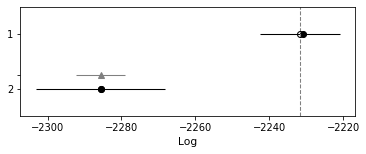

In [11]:
az.plot_compare(w53)